# Lakshay Dang

## **How do factors like a person's age, race, or sex affect their chances of committing suicide?**


### Refined Sub Problems:
- The Black Lives Matter movement emerged in 2013 and 2014, is there a correlation between significant events in the BLM movement and the suicide rate for Black people in the US between the years 2012 and 2014?
- Do more men commit gun-related suicides or women? 
- How does the suicide rate vary with different age groups (For eg. rate for people 13-19, 20-40, and 40 above)? Does this correlation change when we factor in sex?
- Is there a correlation betwen a person's age, sex, race, and the type of location that they commit suicide?
- How does suicide rate differ between different ethnicity groups?
- Is there a significant difference between the number of Black and Hispanic teenagers and young adults that commit gun-related suicide and the number of White people belonging to the same age group?
- Is there a correlation between educational status and suicide rate? Does this correlation change when we factor in race and sex?

# Conducting an EDA

## Step 1: Understanding the Dataset

The first step in an Exploratory Data Analysis is to understand our variables.

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/raw/full_data.csv")
df.reset_index()
print(df.columns)
print(df.shape)
df.head()

Index(['Unnamed: 0', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race',
       'hispanic', 'place', 'education'],
      dtype='object')
(100798, 11)


,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


Now, let's get a better understanding of the different values for each of our variables.

In [2]:
print(df.nunique(axis = 0))
df.describe()

Unnamed: 0    100798
year               3
month             12
intent             4
police             2
sex                2
age              104
race               5
hispanic          39
place             10
education          4
dtype: int64


,Unnamed: 0,year,month,police,age,hispanic
count,100798.000000,100798.000000,100798.000000,100798.000000,100780.000000,100798.000000
mean,50399.500000,2013.000357,6.567601,0.013909,43.857601,114.179607
std,29098.020554,0.816278,3.405609,0.117114,19.496181,61.595734
min,1.000000,2012.000000,1.000000,0.000000,0.000000,100.000000
25%,25200.250000,2012.000000,4.000000,0.000000,27.000000,100.000000
50%,50399.500000,2013.000000,7.000000,0.000000,42.000000,100.000000
75%,75598.750000,2014.000000,9.000000,0.000000,58.000000,100.000000
max,100798.000000,2014.000000,12.000000,1.000000,107.000000,998.000000


Looking at the numeric columns doesn't really give us any new insight other than the fact that more than 75% of the victims are below the age of 60, with an average victim age of about 44.

In [3]:
print("Intent: " , df.intent.unique())
print("Race: " , df.race.unique())
print("Place: " , df.place.unique())
print("Education: " , df.education.unique())

Intent:  ['Suicide' 'Undetermined' 'Accidental' 'Homicide' nan]
Race:  ['Asian/Pacific Islander' 'White' 'Native American/Native Alaskan' 'Black'
 'Hispanic']
Place:  ['Home' 'Street' 'Other specified' nan 'Other unspecified'
 'Trade/service area' 'Farm' 'Industrial/construction' 'School/instiution'
 'Sports' 'Residential institution']
Education:  ['BA+' 'Some college' 'HS/GED' 'Less than HS' nan]


We now get some insight into the categorical columns of the dataset.

We find that every categorical column except 'Race' contains null values, which means that 'Race' may be an important column to ask questions with, since we have a lot of data for it.

## Step 2: Cleaning up the Dataset

Now we spend some time cleaning up the dataset to optimize it for analysis and to remove redundant and useless data.

For example, the 'Hispanic' column won't give us much help in our analysis, nor will 'Police'. We will also be removing the 'Unnamed' column that gets created as a result of writing a dataframe to a file.

In [4]:
df_cleaned = df.drop(columns = [df.columns[0], 'hispanic', 'police'])
df_cleaned

,year,month,intent,sex,age,race,place,education
0,2012,1,Suicide,M,34.0,Asian/Pacific Islander,Home,BA+
1,2012,1,Suicide,F,21.0,White,Street,Some college
2,2012,1,Suicide,M,60.0,White,Other specified,BA+
3,2012,2,Suicide,M,64.0,White,Home,BA+
4,2012,2,Suicide,M,31.0,White,Other specified,HS/GED
...,...,...,...,...,...,...,...,...
100793,2014,12,Homicide,M,36.0,Black,Home,HS/GED
100794,2014,12,Homicide,M,19.0,Black,Street,HS/GED
100795,2014,12,Homicide,M,20.0,Black,Street,HS/GED
100796,2014,12,Homicide,M,22.0,Hispanic,Street,Less than HS


We can also remove all the non-suicide records, since they are not relevant to this analysis.

In [5]:
df_cleaned = df_cleaned[df_cleaned.intent == "Suicide"]
df_cleaned.reset_index(inplace = True)
df_cleaned

,index,year,month,intent,sex,age,race,place,education
0,0,2012,1,Suicide,M,34.0,Asian/Pacific Islander,Home,BA+
1,1,2012,1,Suicide,F,21.0,White,Street,Some college
2,2,2012,1,Suicide,M,60.0,White,Other specified,BA+
3,3,2012,2,Suicide,M,64.0,White,Home,BA+
4,4,2012,2,Suicide,M,31.0,White,Other specified,HS/GED
...,...,...,...,...,...,...,...,...,...
63170,100764,2014,11,Suicide,M,70.0,White,Street,HS/GED
63171,100773,2014,12,Suicide,M,64.0,White,Home,BA+
63172,100782,2014,12,Suicide,M,39.0,Asian/Pacific Islander,Home,BA+
63173,100783,2014,12,Suicide,M,27.0,White,Home,BA+


This creates an 'index' column, which we don't need.

In [6]:
df_cleaned.drop(columns = 'index', inplace = True)


C:\Users\Lakshay\AppData\Local\Temp\ipykernel_14804\1844204378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns = 'index', inplace = True)


And finally, let's remove rows with null values.

In [7]:
df_cleaned.dropna(inplace = True)
df_cleaned

C:\Users\Lakshay\AppData\Local\Temp\ipykernel_14804\4007497300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(inplace = True)


,year,month,intent,sex,age,race,place,education
0,2012,1,Suicide,M,34.0,Asian/Pacific Islander,Home,BA+
1,2012,1,Suicide,F,21.0,White,Street,Some college
2,2012,1,Suicide,M,60.0,White,Other specified,BA+
3,2012,2,Suicide,M,64.0,White,Home,BA+
4,2012,2,Suicide,M,31.0,White,Other specified,HS/GED
...,...,...,...,...,...,...,...,...
63170,2014,11,Suicide,M,70.0,White,Street,HS/GED
63171,2014,12,Suicide,M,64.0,White,Home,BA+
63172,2014,12,Suicide,M,39.0,Asian/Pacific Islander,Home,BA+
63173,2014,12,Suicide,M,27.0,White,Home,BA+


## Step 3: Analyzing Relationships via Visualizations

In [15]:
sns.set_theme(style = "ticks", font_scale = 1.3)

First up, let's try to answer the following question:

**How does the suicide rate vary with different age groups (For eg. rate for people 13-19, 20-40, and 40 above)?**

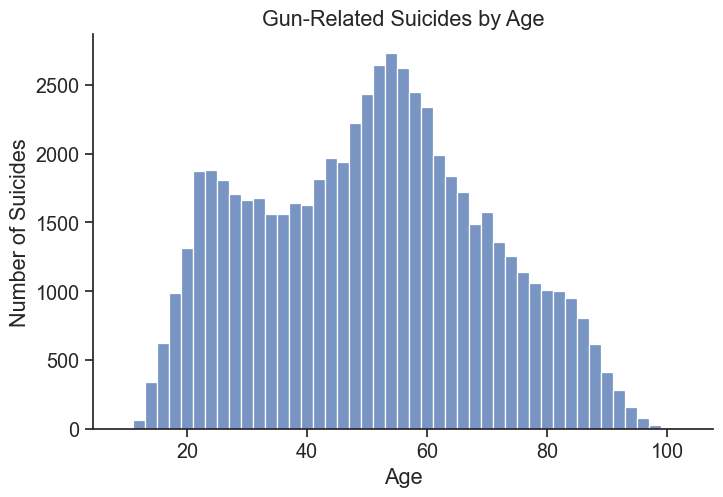

In [16]:
agePlot = sns.displot(df_cleaned, x = 'age', binwidth =  2, height = 5, aspect = 1.5 )
agePlot.set(title = 'Gun-Related Suicides by Age', xlabel = 'Age', ylabel = 'Number of Suicides')


From the graph, we see that:

- The age group 50 - 60 had the most incidents of gun-related suicides
- Teens (< 20 years) were involved in surprisingly little gun-related suicide incidents as compared to people in older age groups

It is also important to note that even though there may seem like a decline in the number of suicides between the ages 25-35, this is not that significant of a decline since there is only a difference of less than 500 cases over the span of two years (2012 - 2014).

Next up, let's use a countplot to try to answer the question:

**Is there a significant difference between the number of Black and Hispanic teenagers and young adults that commit gun-related suicide and the number of White people belonging to the same age group?**

We begin by creating a temporary dataframe that only contains records of a White, Black, or Hispanic victim.

In [17]:
df_temp = df_cleaned[(df_cleaned.race == 'White') | (df_cleaned.race == 'Black') | (df_cleaned.race == 'Hispanic')]
df.dropna(inplace = True)
df_temp

,year,month,intent,sex,age,race,place,education
1,2012,1,Suicide,F,21.0,White,Street,Some college
2,2012,1,Suicide,M,60.0,White,Other specified,BA+
3,2012,2,Suicide,M,64.0,White,Home,BA+
4,2012,2,Suicide,M,31.0,White,Other specified,HS/GED
8,2012,2,Suicide,M,30.0,White,Home,Some college
...,...,...,...,...,...,...,...,...
63169,2014,11,Suicide,F,66.0,Black,Other specified,BA+
63170,2014,11,Suicide,M,70.0,White,Street,HS/GED
63171,2014,12,Suicide,M,64.0,White,Home,BA+
63173,2014,12,Suicide,M,27.0,White,Home,BA+


Now, we can start plotting!

Text(0.5, 1.0, 'Hispanic')

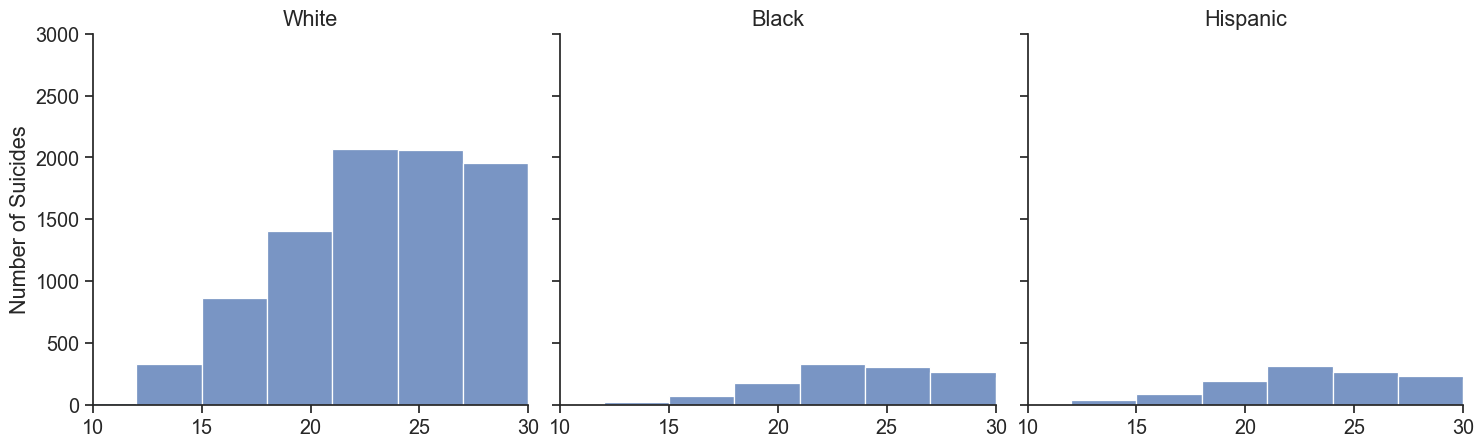

In [18]:
g = sns.displot(
    df_temp, x="age", col="race",
    binwidth=3, height=5, facet_kws=dict(margin_titles=True),
)
g.set(xlabel = "", ylabel = 'Number of Suicides', xlim = (10,30), ylim = (0,3000))
fig = g.figure

a1 = fig.axes[0]
a1.set_title("White")
a2 = fig.axes[1]
a2.set_title("Black")
a3 = fig.axes[2]
a3.set_title("Hispanic")




We see that there is quite a big disparity between gun-related suicides among White young adults vs Black and Hispanic young adults.

Next, it might be useful to look at how the number of gun-related suicides has changed from 2012 to 2014, while keeping in mind some significant changes to gun-related policies that were made during the same time. Thus, we attempt to gain insight about the question:

**How has the number of gun-related suicides change with time? Does it have a correlation with changes in gun policies over the years 2012 to 2014?**

Text(0.5, 1.0, '2014')

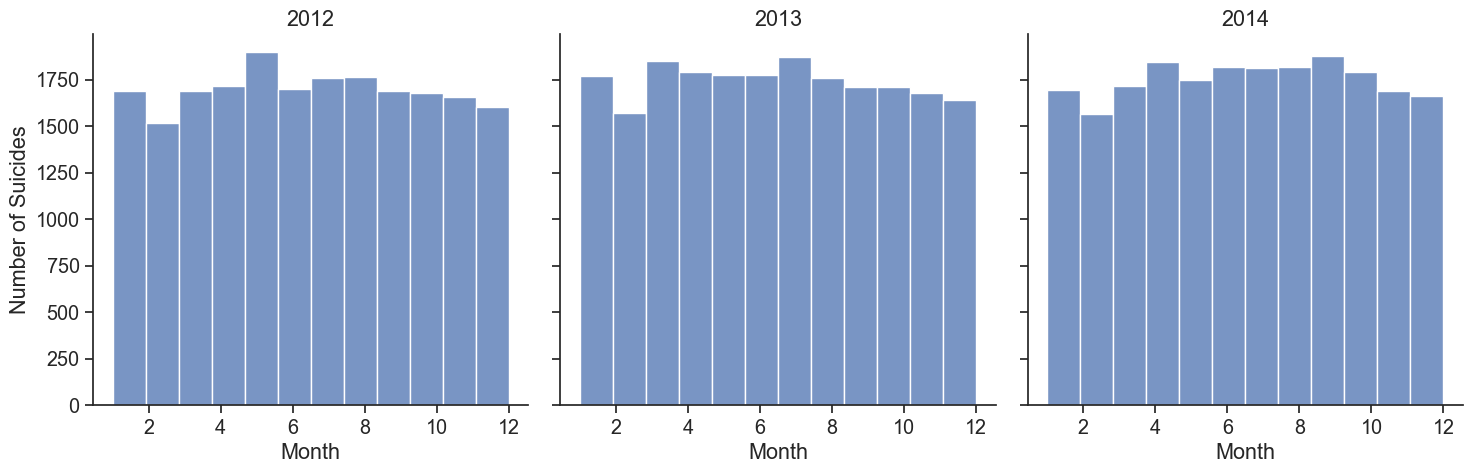

In [60]:
g = sns.displot(
    df_cleaned, x="month", col="year",
    bins = 12, height=5, facet_kws=dict(margin_titles=True),
)
g.set(xlabel = "Month", ylabel = "Number of Suicides" )
fig = g.figure

a1 = fig.axes[0]
a1.set_title("2012")
a2 = fig.axes[1]
a2.set_title("2013")
a3 = fig.axes[2]
a3.set_title("2014")

Individual plots for the 3 years seems inconclusive, so we can try seeing if there is a general trend over this time period.

In [12]:
df_time = df_cleaned.copy()
df_time["decYear"] = df_cleaned['year'] + (df_cleaned['month']/12)
df_time

,year,month,intent,sex,age,race,place,education,decYear
0,2012,1,Suicide,M,34.0,Asian/Pacific Islander,Home,BA+,2012.083333
1,2012,1,Suicide,F,21.0,White,Street,Some college,2012.083333
2,2012,1,Suicide,M,60.0,White,Other specified,BA+,2012.083333
3,2012,2,Suicide,M,64.0,White,Home,BA+,2012.166667
4,2012,2,Suicide,M,31.0,White,Other specified,HS/GED,2012.166667
...,...,...,...,...,...,...,...,...,...
63170,2014,11,Suicide,M,70.0,White,Street,HS/GED,2014.916667
63171,2014,12,Suicide,M,64.0,White,Home,BA+,2015.000000
63172,2014,12,Suicide,M,39.0,Asian/Pacific Islander,Home,BA+,2015.000000
63173,2014,12,Suicide,M,27.0,White,Home,BA+,2015.000000


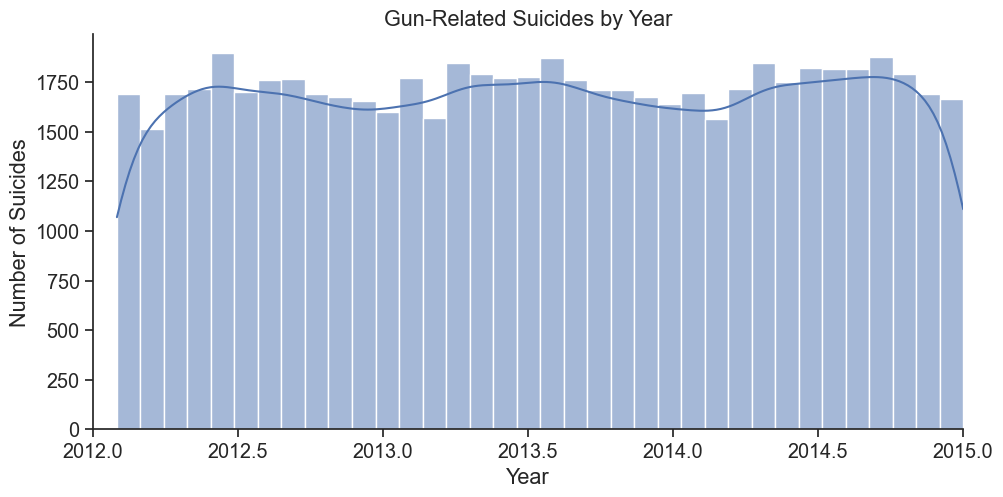

In [57]:
g = sns.displot(data = df_time, x = 'decYear', height = 5, aspect = 2, kde = True, bins = 36)
g.set(title = "Gun-Related Suicides by Year", xlabel = "Year", ylabel = "Number of Suicides",xlim = (2012,2015))

Once again, the only information we are able to gather is that the number of suicide incidents fall by a very small margin towards the end of the year, during the holidays.

Lastly, we shall look at the relationship between the person's age, race, and sex using a violin plot in order to find general trends.

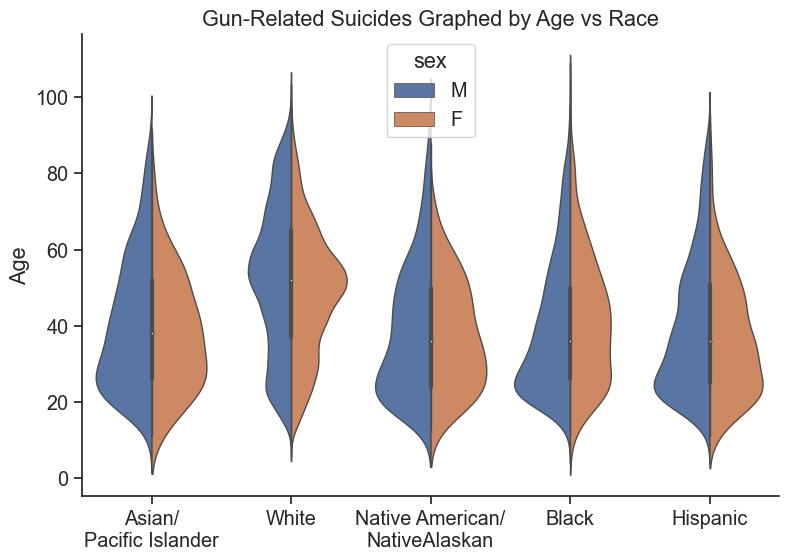

In [56]:
plt.figure(figsize=(9, 6))
g = sns.violinplot(data=df_cleaned, x="race", y="age", hue="sex",
               split=True, inner="box", linewidth=1)
g.set(title = "Gun-Related Suicides Graphed by Age vs Race" , xlabel = "", ylabel = "Age")
g.set_xticklabels(['Asian/\nPacific Islander', 'White', 'Native American/\nNativeAlaskan','Black','Hispanic'])
sns.despine()

